## Customer Transaction Prediction

Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in future.



In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Load the Dataset

In [2]:
cust_data = pd.read_csv("data\\train.csv")
cust_data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


#### Basic Checks

In [3]:
# View the first five rows of the dataset
cust_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
# View the last five rows of the dataset
cust_data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [5]:
# View the statistical information of the numerical columns (features)
cust_data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,200000.0,0.100490,0.300653,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,200000.0,10.679914,3.040051,0.4084,8.453850,10.52475,12.758200,20.3150
var_1,200000.0,-1.627622,4.050044,-15.0434,-4.740025,-1.60805,1.358625,10.3768
var_2,200000.0,10.715192,2.640894,2.1171,8.722475,10.58000,12.516700,19.3530
var_3,200000.0,6.796529,2.043319,-0.0402,5.254075,6.82500,8.324100,13.1883
...,...,...,...,...,...,...,...,...
var_195,200000.0,-0.142088,1.429372,-5.2610,-1.170700,-0.17270,0.829600,4.2729
var_196,200000.0,2.303335,5.454369,-14.2096,-1.946925,2.40890,6.556725,18.3215
var_197,200000.0,8.908158,0.921625,5.9606,8.252800,8.88820,9.593300,12.0004
var_198,200000.0,15.870720,3.010945,6.2993,13.829700,15.93405,18.064725,26.0791


In [6]:
# View datatype information about the dataset
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


## Data Preprocessing

In [7]:
# Check for null values
cust_data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

#### We do not have missing values in our dataset.

#### Drop the Unnamed Column

In [8]:
# Drop the unnamed column [ID_code] in the dataset as it doesn't seem useful for the business case.
cust_data.drop('ID_code', axis=1, inplace=True)

In [9]:
# Check the dataset after dropping the unnamed column
cust_data

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


## Feature Selection

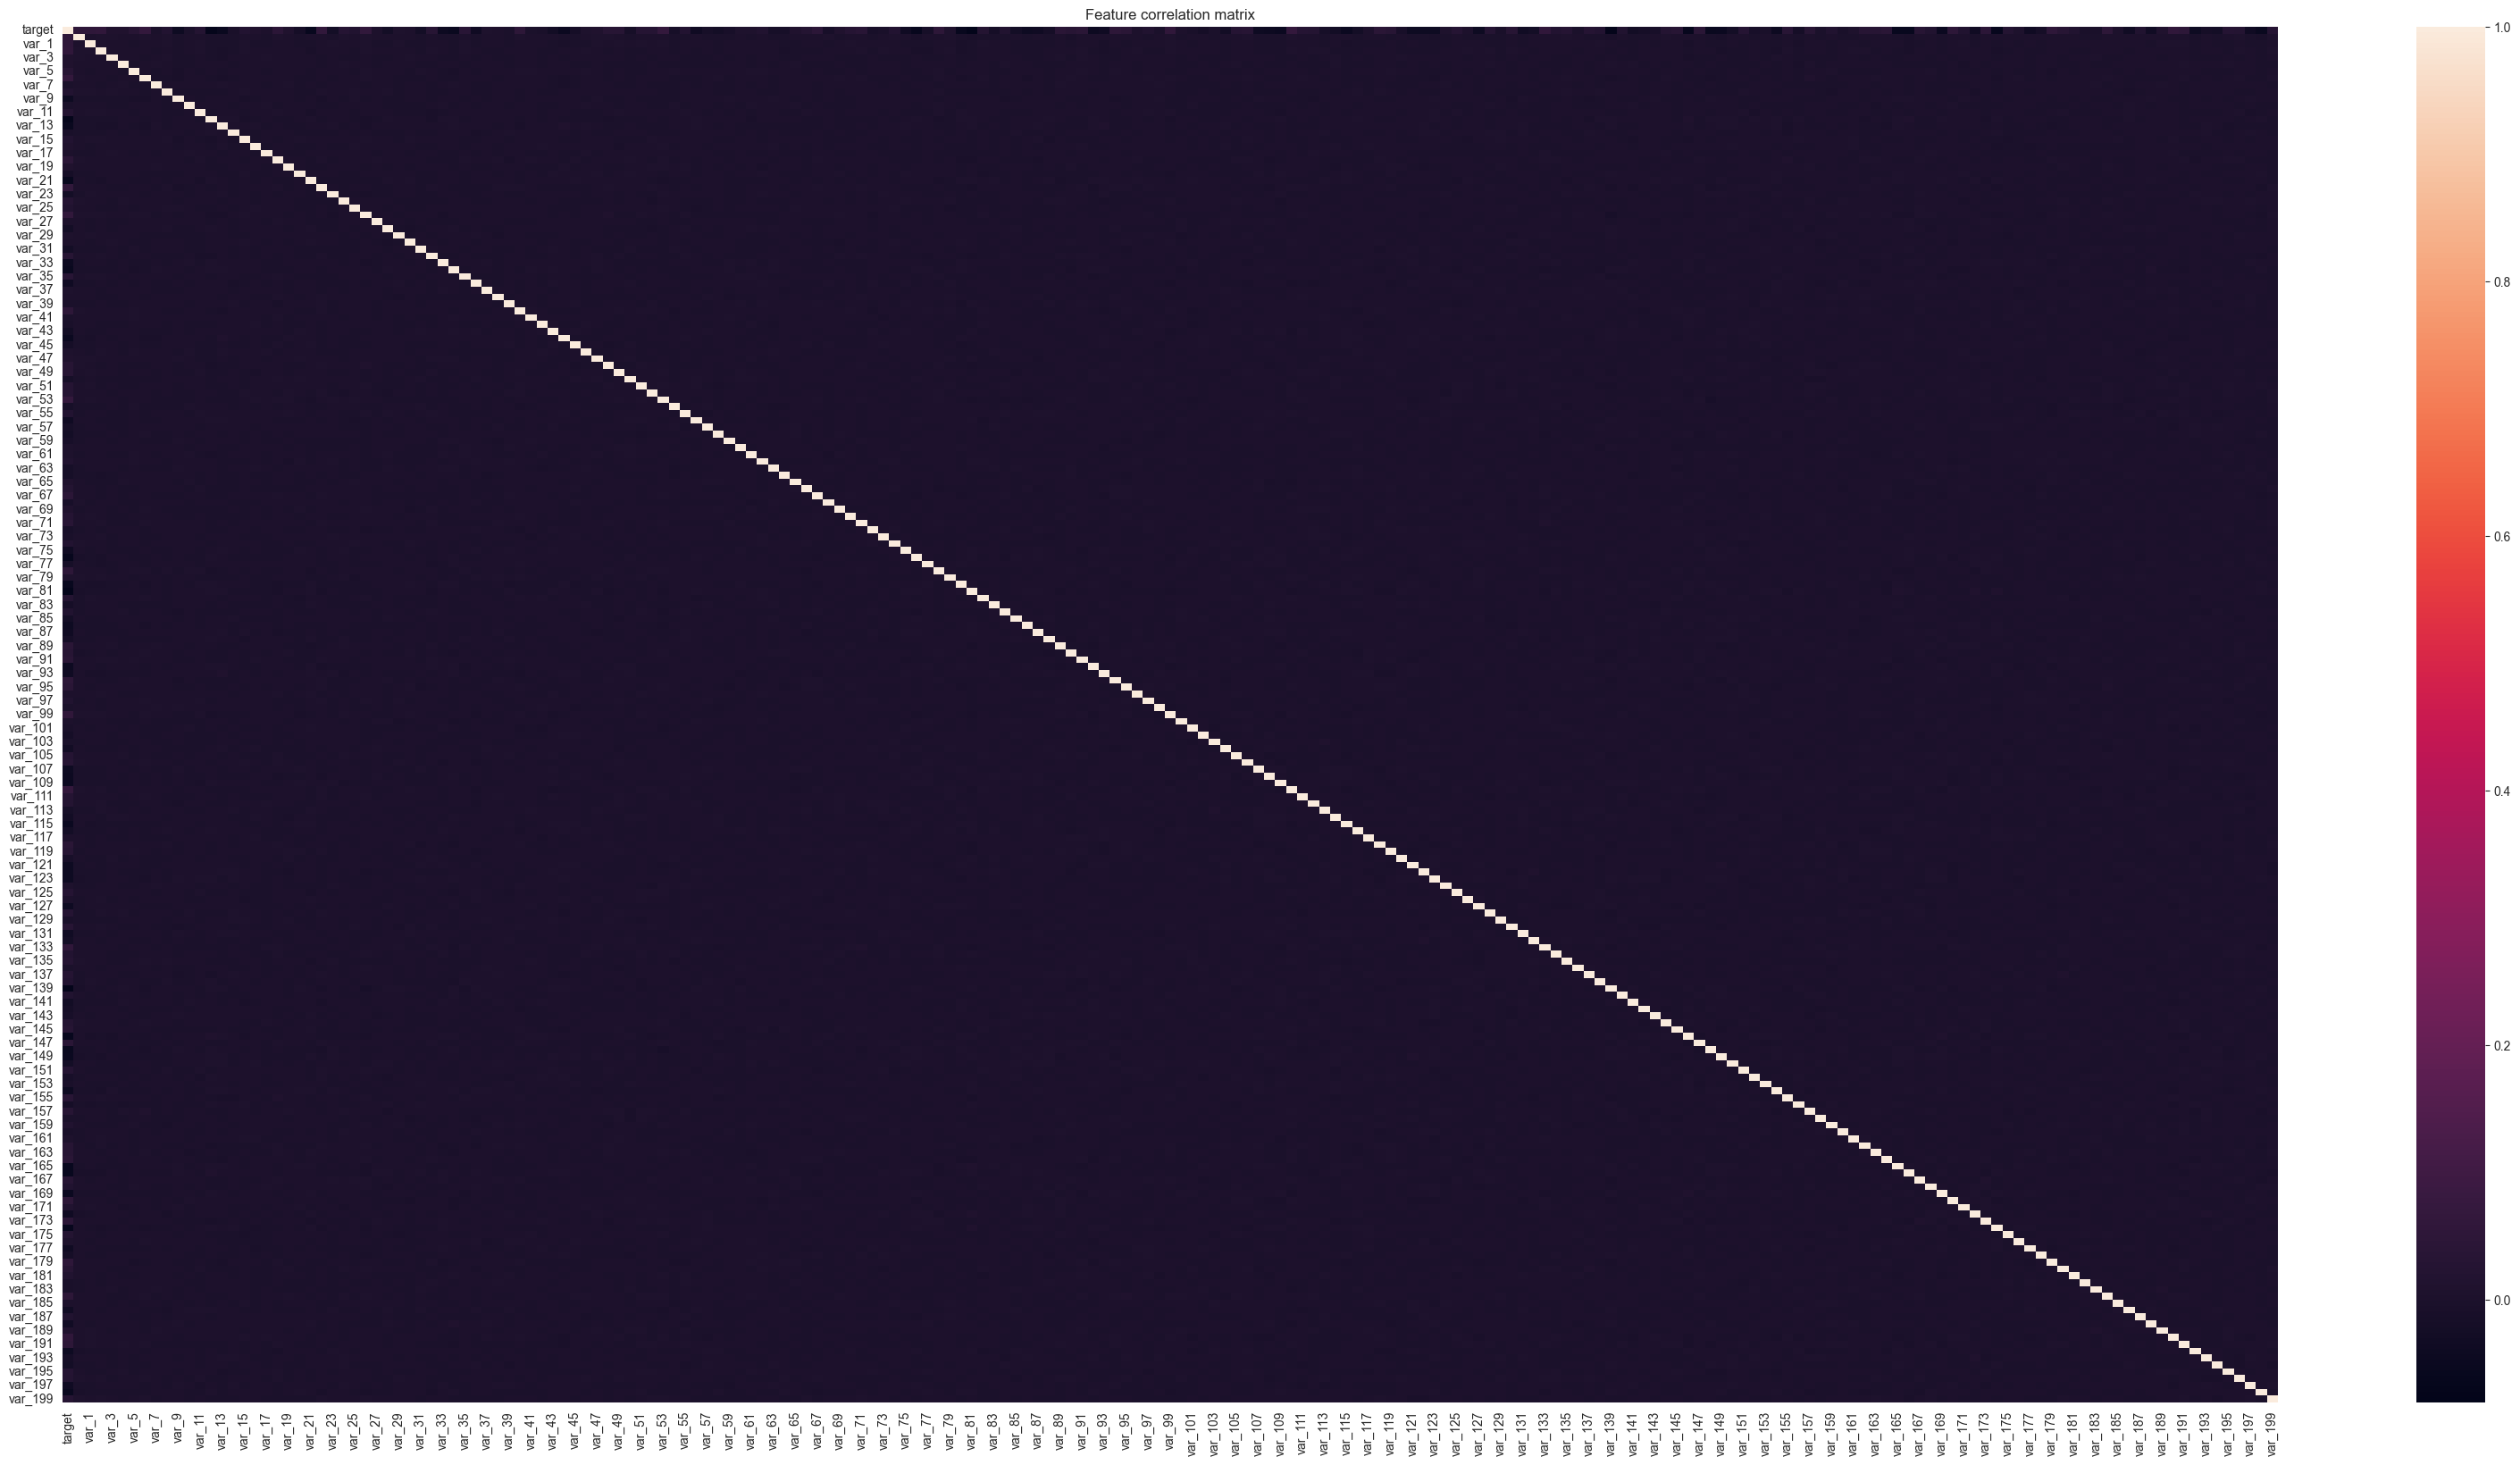

In [10]:
# Check Correlation
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(cust_data.corr())
ax.set_title('Feature correlation matrix')
plt.show()

As can be seen in the above diagram all values are between 0 & 1. There is no correlation.

#### Value Counts of Target Variable

In [11]:
cust_data.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

### Data Analysis

In [12]:
# Create X
X=cust_data.drop(labels=['target'], axis=1)
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,8.7542,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [13]:
# Create y
# In this case whether the customer will not do a transaction (1) or not (0).
y=cust_data.target
y

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64

#### Scale the Data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [15]:
scaled_data

array([[-0.57710174, -1.27373702,  0.45170728, ..., -0.37396811,
        -1.02639785,  0.21413482],
       [ 0.26995857, -0.62213756,  1.19036045, ..., -0.12939961,
         0.82541712,  0.50568523],
       [-0.68111341, -0.2760664 ,  0.51698836, ..., -0.69514059,
        -0.38144932,  0.35668144],
       ...,
       [ 0.17870987, -0.84546901, -0.07667568, ..., -0.20904171,
        -0.67680579,  0.72102365],
       [-0.31746727, -1.72398014,  1.09630117, ...,  1.22180338,
        -0.11352617, -1.01298853],
       [ 0.06456676, -1.00810962,  0.53130173, ..., -0.78389704,
        -1.24290845,  0.33196403]])

In [16]:
# Create a new dataframe
df=pd.DataFrame(data=scaled_data, columns= X.columns)

In [17]:
df

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.265814,0.279509,-0.928851,-1.606375,-0.454632,2.120424,0.302273,-0.407906,-0.271576,-1.538651,...,0.637526,1.915840,1.394910,-0.599439,0.009925,-1.155623,-0.025161,-0.407496,0.264130,-1.392947
199996,-1.896359,-0.202660,2.268180,-0.079297,-1.705783,-0.699136,0.543790,1.476902,-1.189411,-1.267410,...,0.378661,-0.920696,-0.830643,-0.375167,1.364499,1.312319,-0.819242,-2.350481,0.011518,0.351154
199997,0.178710,-0.845469,-0.076676,-0.563266,-1.070350,-0.043657,-0.984818,1.466106,-0.049199,-1.137053,...,0.182166,-0.660547,0.795012,0.387655,1.766202,-1.001499,-0.187031,-0.209042,-0.676806,0.721024
199998,-0.317467,-1.723980,1.096301,-0.491128,0.886530,0.712074,0.737304,0.137314,-0.743186,0.961052,...,-0.120713,0.403634,0.545083,1.950397,0.772535,0.044417,0.824051,1.221803,-0.113526,-1.012989


In [18]:
# Quick verification/check of our new dataframe
df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375


### Use Principal Component Analysis (PCA) to reduce the dimensionality of our data.

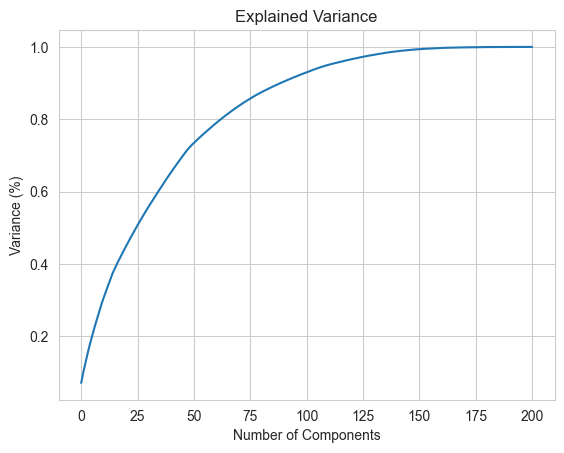

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(cust_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # For each component
plt.title('Explained Variance')
plt.show()

In [20]:
pca = PCA(n_components=75)
new_data = pca.fit_transform(cust_data)
principal_df = pd.DataFrame(data = new_data
                            , columns = ['principal component 1',
                                         'principal component 2',
                                         'principal component 3',
                                         'principal component 4',
                                         'principal component 5',
                                         'principal component 6',
                                         'principal component 7',
                                         'principal component 8',
                                         'principal component 9',
                                         'principal component 10',
                                         'principal component 11',
                                         'principal component 12',
                                         'principal component 13',
                                         'principal component 14',
                                         'principal component 15',
                                         'principal component 16',
                                         'principal component 17',
                                         'principal component 18',
                                         'principal component 19',
                                         'principal component 20',
                                         'principal component 21',
                                         'principal component 22',
                                         'principal component 23',
                                         'principal component 24',
                                         'principal component 25',
                                         'principal component 26',
                                         'principal component 27',
                                         'principal component 28',
                                         'principal component 29',
                                         'principal component 30',
                                         'principal component 31',
                                         'principal component 32',
                                         'principal component 33',
                                         'principal component 34',
                                         'principal component 35',
                                         'principal component 36',
                                         'principal component 37',
                                         'principal component 38',
                                         'principal component 39',
                                         'principal component 40',
                                         'principal component 41',
                                         'principal component 42',
                                         'principal component 43',
                                         'principal component 44',
                                         'principal component 45',
                                         'principal component 46',
                                         'principal component 47',
                                         'principal component 48',
                                         'principal component 49',
                                         'principal component 50',
                                         'principal component 51',
                                         'principal component 52',
                                         'principal component 53',
                                         'principal component 54',
                                         'principal component 55',
                                         'principal component 56',
                                         'principal component 57',
                                         'principal component 58',
                                         'principal component 59',
                                         'principal component 60',
                                         'principal component 61',
                                         'principal component 62',
                                         'principal component 63',
                                         'principal component 64',
                                         'principal component 65',
                                         'principal component 66',
                                         'principal component 67',
                                         'principal component 68',
                                         'principal component 69',
                                         'principal component 70',
                                         'principal component 71',
                                         'principal component 72',
                                         'principal component 73',
                                         'principal component 74',
                                         'principal component 75'
                                         ])

In [21]:
# New PCA DataFrame
principal_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 66,principal component 67,principal component 68,principal component 69,principal component 70,principal component 71,principal component 72,principal component 73,principal component 74,principal component 75
0,-5.606504,-23.554582,-1.900098,5.221485,2.466875,-8.622570,2.712437,-15.071810,11.418093,1.581472,...,-4.117920,-10.008288,-4.143509,8.118198,8.560392,2.089495,-5.809332,-0.240842,-6.733482,1.704414
1,34.878015,11.468747,-3.759226,-19.274732,-8.544145,6.985484,-15.539482,-2.989972,8.117197,19.063346,...,1.446357,-2.844786,5.373868,-6.306357,1.091865,-5.034302,4.585864,-8.387397,-4.188509,3.371918
2,-4.790251,-0.335042,11.358784,8.532226,1.329822,-3.218036,22.020919,-1.662571,-4.057054,6.218265,...,-0.407184,5.649923,-6.582674,3.004309,2.978782,1.735208,-0.932842,-2.574820,-2.724054,-0.433049
3,11.875351,14.051183,24.017341,-4.419585,0.371661,5.806368,20.133351,12.237218,-1.443176,-14.338702,...,-1.197722,9.901941,2.539227,6.331006,2.738274,4.116614,9.729021,-0.697889,-3.911518,-4.617435
4,52.713097,24.315803,4.334106,23.858687,-17.869057,16.346889,-15.375779,11.752883,-18.459127,-14.799062,...,8.784562,-7.617838,-8.658890,2.005839,0.566255,-7.688754,2.605664,-4.509873,2.013717,-1.058572


#### Visualizing the Principal Components

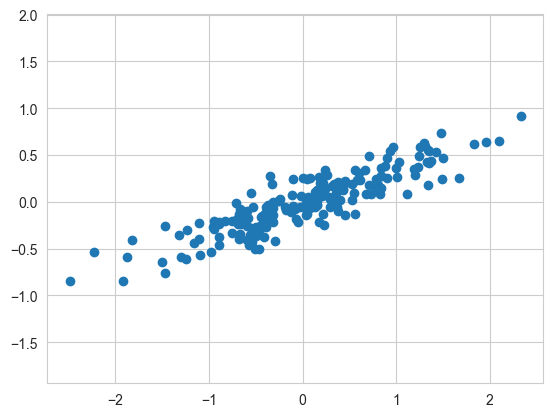

In [22]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

#### Check data distribution for every column

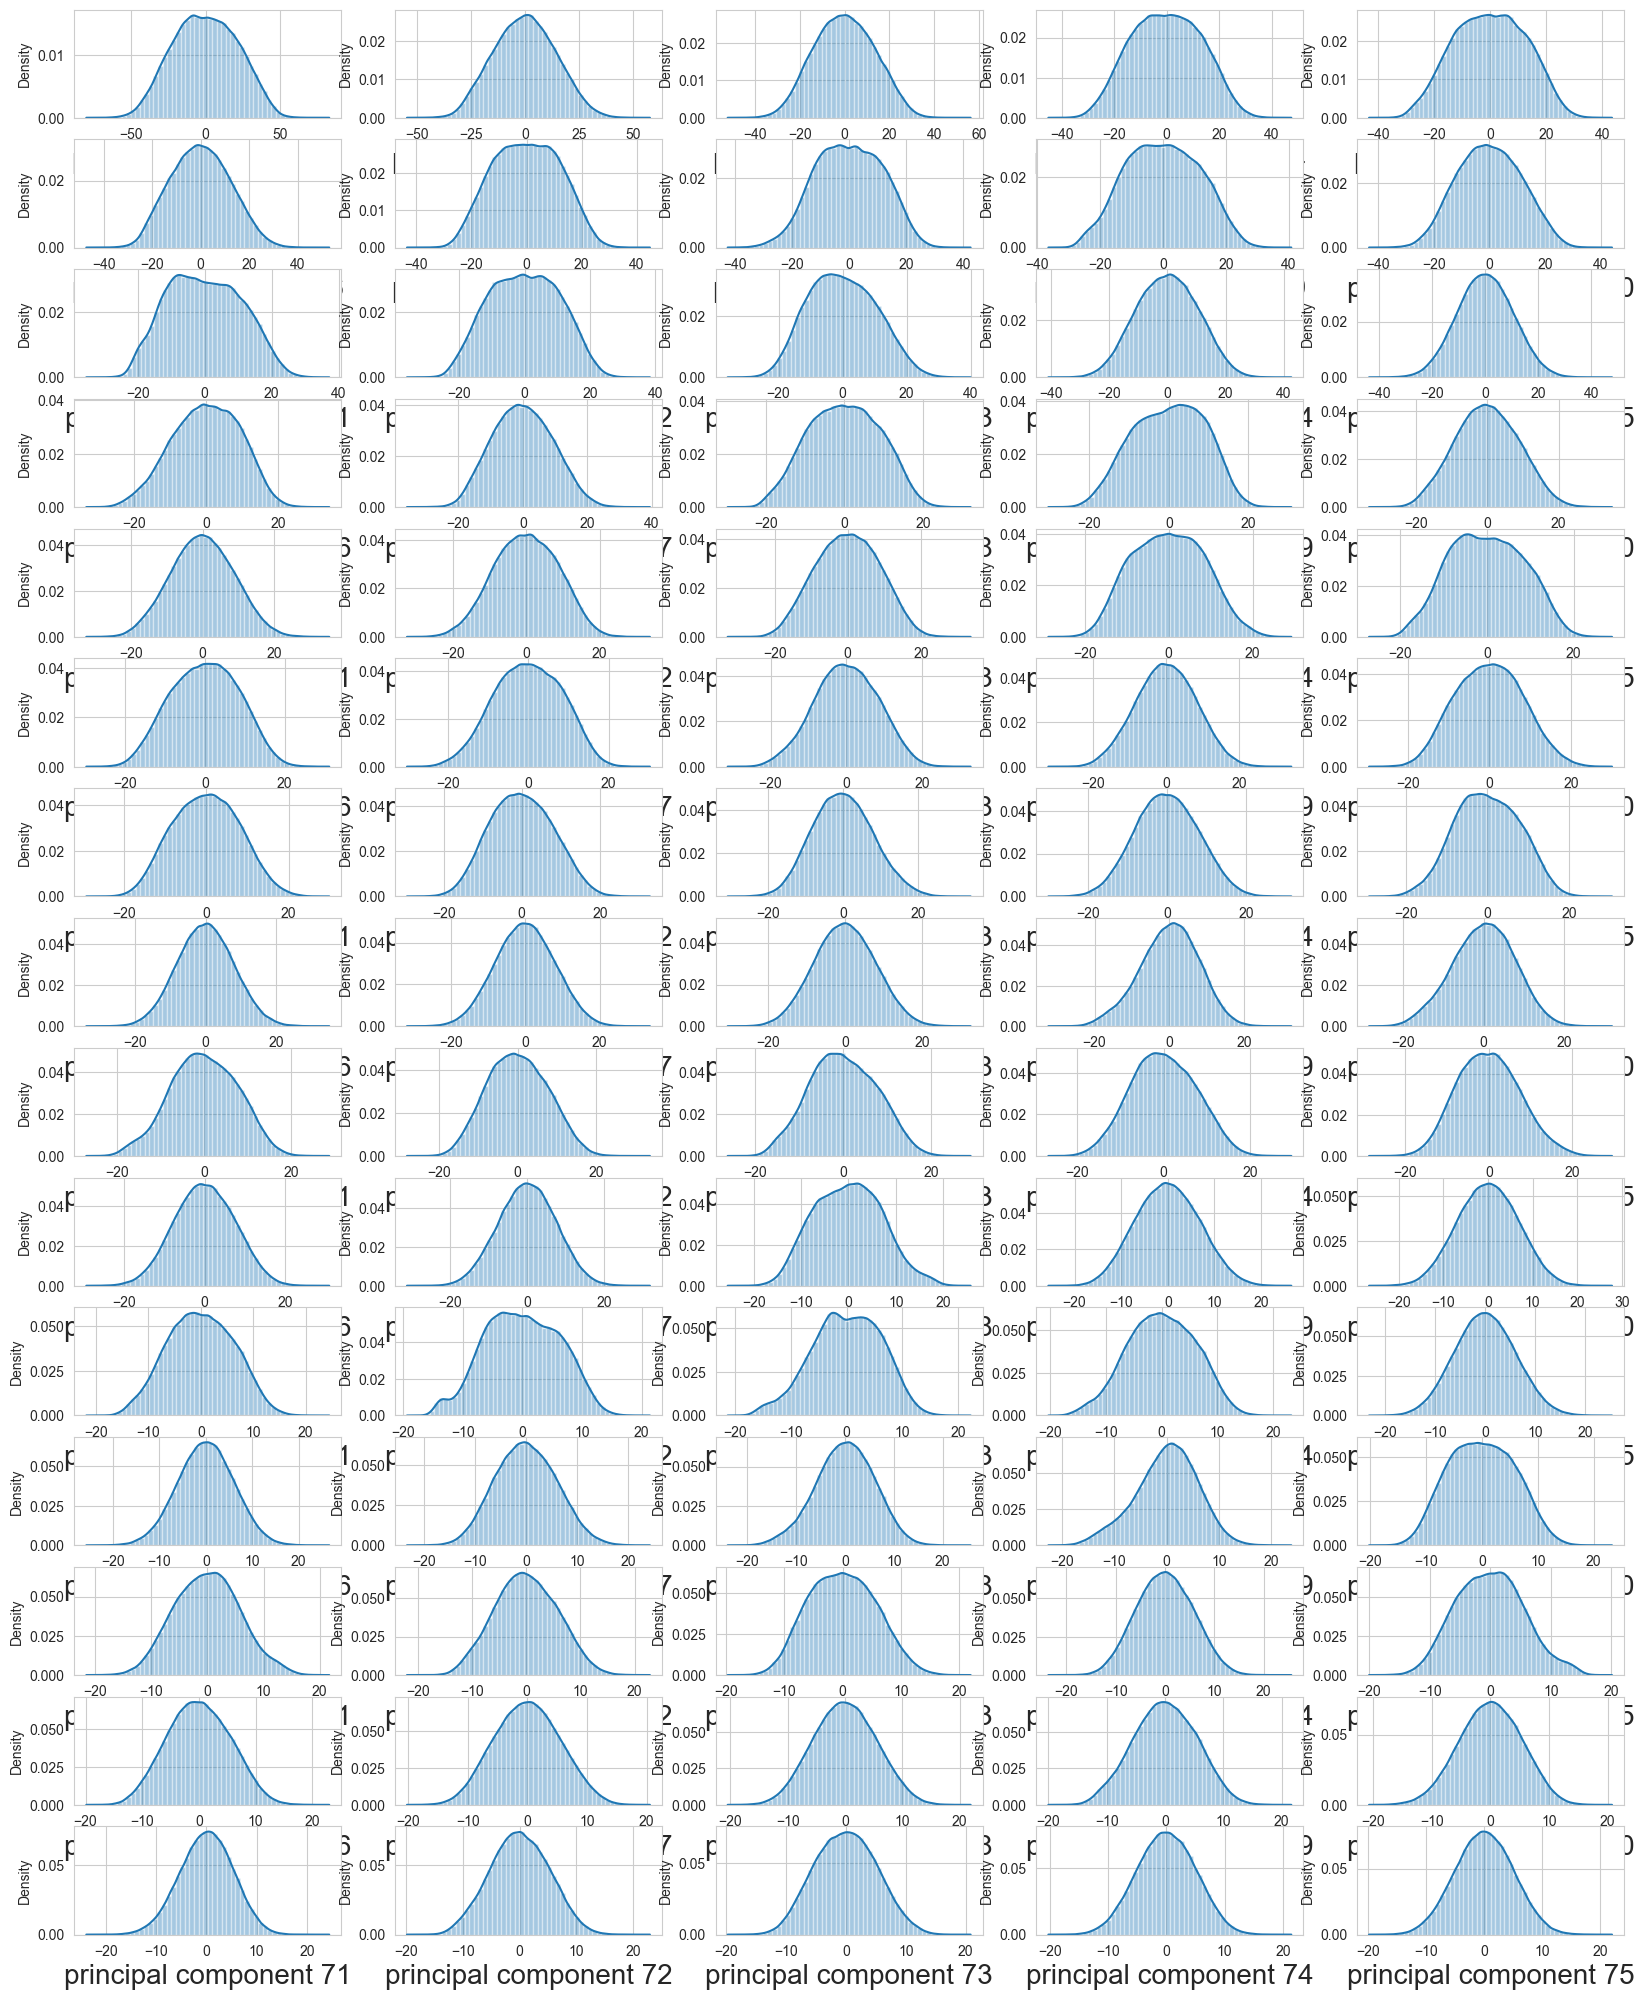

In [23]:
# Defining  canvas size
plt.figure(figsize=(20,25), facecolor='white')

# Maintain count for graph
plotnumber = 1

for column in principal_df:
    if plotnumber<=75 : # Consider there are 75 PCAs
        ax = plt.subplot(15,5,plotnumber) # Plotting 75 graphs (15-rows,5-columns), plot number is for count
        sns.distplot(principal_df[column]) # Plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.show()

All of our PCA features follow the standard normal distribution.

### Use Logistic Regression with the PCA data

In [24]:
X = principal_df

In [25]:
X

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 66,principal component 67,principal component 68,principal component 69,principal component 70,principal component 71,principal component 72,principal component 73,principal component 74,principal component 75
0,-5.606504,-23.554582,-1.900098,5.221485,2.466875,-8.622570,2.712437,-15.071810,11.418093,1.581472,...,-4.117920,-10.008288,-4.143509,8.118198,8.560392,2.089495,-5.809332,-0.240842,-6.733482,1.704414
1,34.878015,11.468747,-3.759226,-19.274732,-8.544145,6.985484,-15.539482,-2.989972,8.117197,19.063346,...,1.446357,-2.844786,5.373868,-6.306357,1.091865,-5.034302,4.585864,-8.387397,-4.188509,3.371918
2,-4.790251,-0.335042,11.358784,8.532226,1.329822,-3.218036,22.020919,-1.662571,-4.057054,6.218265,...,-0.407184,5.649923,-6.582674,3.004309,2.978782,1.735208,-0.932842,-2.574820,-2.724054,-0.433049
3,11.875351,14.051183,24.017341,-4.419585,0.371661,5.806368,20.133351,12.237218,-1.443176,-14.338702,...,-1.197722,9.901941,2.539227,6.331006,2.738274,4.116614,9.729021,-0.697889,-3.911518,-4.617435
4,52.713097,24.315803,4.334106,23.858687,-17.869057,16.346889,-15.375779,11.752883,-18.459127,-14.799062,...,8.784562,-7.617838,-8.658890,2.005839,0.566255,-7.688754,2.605664,-4.509873,2.013717,-1.058572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-10.724404,-1.958604,18.591366,0.293437,12.730583,-3.276147,-4.492241,8.567146,-7.255262,-22.982439,...,-3.485805,2.899361,2.853439,-1.154375,8.490651,-6.907491,-6.483915,-5.715246,9.391798,-8.151902
199996,14.450743,-0.233710,-16.938564,19.531484,-14.598066,-2.183338,1.677676,0.957230,8.626438,11.097590,...,-5.587370,6.313916,6.145515,-7.474676,-7.393333,-4.155180,4.868061,-2.995364,-3.909246,-8.261947
199997,36.842243,7.759490,30.232059,-9.885228,7.401839,4.181999,-1.550166,-5.242704,-3.428946,2.321916,...,-5.310109,-3.968757,-5.817138,6.736952,7.757172,-8.246199,-5.267349,-5.461783,13.306460,-0.758115
199998,30.230867,-24.423086,25.553840,22.587829,-8.758671,-5.847910,1.111786,3.362714,8.652899,11.480534,...,3.271686,3.851763,9.904722,-7.747741,-4.276331,7.112844,0.197747,-6.623690,3.515986,-6.033166


In [26]:
y

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64

## Model Creation

In [27]:
# Create training and testing data, then split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=455)

In [28]:
# Logistic Regression Model Creation
from sklearn.linear_model import LogisticRegression

# Function call
log_reg = LogisticRegression()

# Train the model using fit function
log_reg.fit(x_train,y_train)

LogisticRegression()

In [29]:
# Predicting y_train
y_train_pre=log_reg.predict(x_train)
y_train_pre

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [30]:
# Testing the model
y_pred = log_reg.predict(x_test)

In [31]:
# Check model accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_train,y_train_pre)
accuracy

0.9006375

### Acuuracy of Logistic Regression : 90%

#### Model Evalution (LR)

In [32]:
# Confusion matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
target,,
0,35960,121
1,3744,175


#### Use K-NN Algorithm

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [34]:
# Scale the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [35]:
# Split the training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [36]:
# Taking optimal k to determine how many nearest neighbors to create.

error_rate = [] # Create a list to store the error values for each k

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

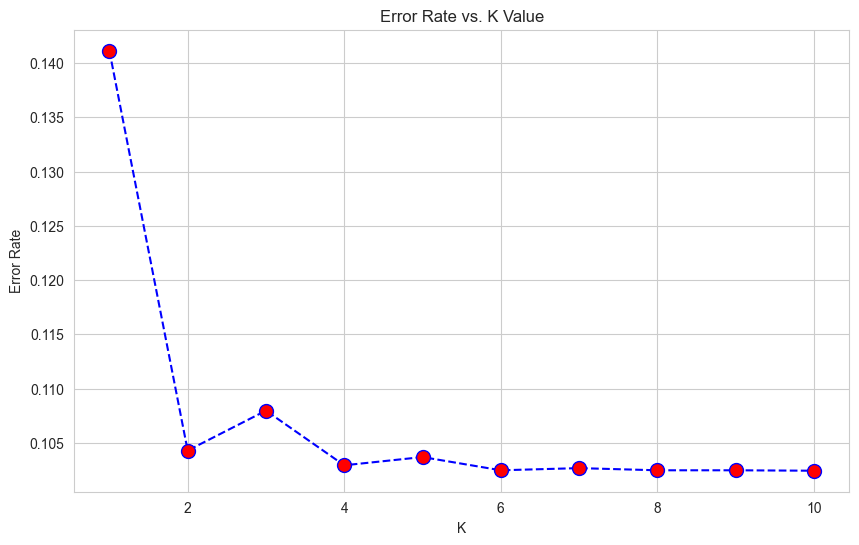

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
# Fit the data into KNN model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [39]:
# Predict
y_pred = knn.predict(X_test)

In [40]:
# Check Accuracy Score
print("The k-NN accuracy score is : ", accuracy_score(y_test,y_pred))

The k-NN accuracy score is :  0.89754


### Accuracy of K-NN model : 89%

In [41]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     44880
           1       0.42      0.00      0.00      5120

    accuracy                           0.90     50000
   macro avg       0.66      0.50      0.47     50000
weighted avg       0.85      0.90      0.85     50000



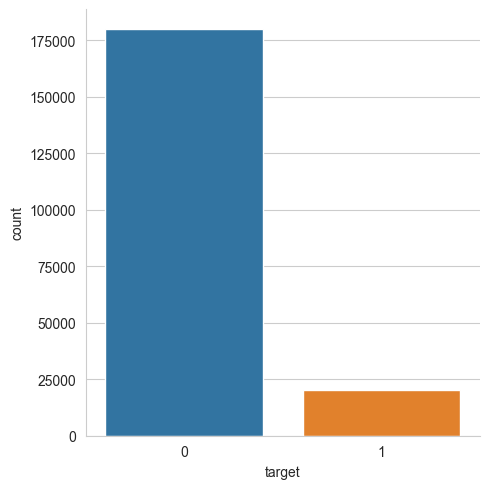

In [42]:
# Checking the balance of target
sns.catplot(x='target',data=cust_data,kind='count')

#### Apply SMOTE to Balance Data

In [45]:
# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [46]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [47]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 135022, 1: 14978})
SMOTE Classes Counter({0: 135022, 1: 135022})


In [48]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=6)

In [49]:
# Predict the output for X_test
y_pred = knn.predict(X_test)

In [50]:
print("After balancing with SMOTE the accuracy score is: ", accuracy_score(y_test,y_pred))

After balancing with SMOTE the accuracy score is:  0.17122


In [51]:
# Classification Report (SMOTE)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.08      0.15     44880
           1       0.10      0.94      0.19      5120

    accuracy                           0.17     50000
   macro avg       0.52      0.51      0.17     50000
weighted avg       0.84      0.17      0.16     50000



In [52]:
pd.crosstab(y_test, y_pred)

col_0,0,1
target,,
0,3740,41140
1,299,4821


### Accuracy of K-NN model after balancing data: 17%

### Use RandomForest Algorithm 

In [53]:
# Importing necessary libary
from sklearn.ensemble import RandomForestClassifier

# Object creation (taking 100 decision tree in random forest)
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
# Testing
y_predict=rf_clf.predict(X_test)
f_Score=f1_score(y_test,y_predict)
f_Score

0.0

In [54]:
print("The RandomForest accuracy score is : ", accuracy_score(y_test,y_predict))

The RandomForest accuracy score is :  0.8976


In [55]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     44880
           1       0.00      0.00      0.00      5120

    accuracy                           0.90     50000
   macro avg       0.45      0.50      0.47     50000
weighted avg       0.81      0.90      0.85     50000



### Acuuracy of RandomForest : 90%

### Use XGBoost Algorithm 

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

In [57]:
## evaluating the model
from sklearn.metrics import r2_score # to check model performance
r2_score(y_test,y_gbm)#checking r2score

0.06964461051619797

In [58]:
X_test.shape #rows and columns

(50000, 75)

In [59]:
adj_r2_score=1-(1-0.071)*(50000-1)/(50000-75-1)#adjusted r2 score
adj_r2_score

0.06960437865555635

In [60]:
# Training score
y_pr_tra = gbm.predict(X_train)

In [61]:
r2_score(y_train,y_pr_tra)

0.08851904252597242

In [62]:
X_train.shape

(150000, 75)

In [63]:
# adjusted r2score
adj_r2_tra=1-(1-0.089)*(150000-1)/(150000-75-1)
adj_r2_tra

0.08854426909634205

In [56]:
## Installing XGB library

!pip install xgboost

In [64]:
#importing the model library
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
xgb_r= XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

In [65]:
r2_score(y_test,y_hat)#R2 score

0.0702461497442215

### Hyper parameter tunning in XGBoost 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] # no. of models 
max_depth = [3,4,5,6]#The maximum depth of a tree
learning_rate=[0.1,0.2,0.3] #Typical final values to be used: 0.01-0.3
gamma=[0, 1, 2, 3, 4] # Gamma specifies the minimum loss reduction required to make a split. It controls the overfitting. 
                      # Ranges from 0 to ∞.
subsample=[0.5,0.7,1] # no of samples to be used. For eg: 0.5 -> half of the training data (50%) used to train each tree.
                     #Lower values make the algorithm more conservative and prevents overfitting but too 
                     #small values might lead to under-fitting.Typical values: 0.5-1. Range: (0,1)
colsample_bytree=[0.5,0.7,1]#Denotes the fraction of columns to be randomly samples for each tree. Ranges from 0 to 1
                          # ie., % of features should be taken for each tree

params={
    'max_depth':max_depth,'learning_rate':learning_rate,'n_estimators':n_estimators,
     'gamma':gamma, 'subsample':subsample, 'colsample_bytree':colsample_bytree
}

XGB=XGBRegressor(random_state=42)

rcv= RandomizedSearchCV(XGB, scoring='r2',param_distributions=params, n_iter=100, cv=3, 
                                random_state=42, n_jobs=-1)
                              
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train) ##training data on randomsearch cv.
cv_best_params = rcv.best_params_ ##it will give you best parameters 
print(f"Best paramters: {cv_best_params}")  ##printing  best parameters

In [ ]:
cv_best_params

In [ ]:
XGB2=XGBRegressor(subsample= 1,
 n_estimators= 1400,
 max_depth= 4,
 learning_rate= 0.3, gamma=4,
 colsample_bytree= 0.5)

XGB2.fit(X_train, y_train)

In [ ]:
y_predict=XGB2.predict(X_test)#testing

In [ ]:
r2_score2=r2_score(y_test,y_predict)#checking performance
r2_score2

# Data Analysis Report

#### Problem Statement/Tasks

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in the future.

#### Dataset Details

We were provided an anonymized dataset containing 200 numeric feature variables, the binary target column, and a string ID_code column.

#### Problem Analysis

This is a binary classification problem, and the task is to predict the value of target column in the test dataset.

#### Metrics

This is a classification problem and we can use the confusion matrix to properly evaluate the model results. The confusion matrix is one of the performance measurments used in machine learning classification problems where output can be two or more classes.

It is useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC Curve.

#### Exploratory Data Analysis (EDA)

At the EDA stage we check for variable data types, missing values, shape of data, and the balance of the target column. Please refer to the EDA section of the notebook for the output/results.


#### Feature Selection

We have 200 features that are mostly uncorrelated.

Removing redundant columns: One unique value columns,ids columns, serial no.

Check for highly correlated features. If the correlation between two numerical features is more than 0.9, we should remove one of them otherwise this will reduce the accuracy of our model.
             

#### Visualizations

Almost all features follow normalised distribution.

Distribution of all numerical features per each class: The majority of customers did not perform/complete the transaction (179902). There are close to 200 features/variables and we needed to reduce the dimensionality of our dataset.


#### Dealing Imbalanced Data

Before modelling for this dataset we needed to deal with the imbalanced data. The conventional model evaluation methods do not accurately measure model performance when faced with imbalanced datasets. Standard classifier algorithms like Logistic Regression, Random Forest, and k-NN have a bias towards classes which have large number of instances.

Therefore, there is a high probability of misclassification. The SMOTE technique was used to balance the data.

#### Model Creation

Step 1: Create X (independent variable), and y (dependent variable)
Step 2: Apply any feature transformation method based on algorithm
Step 3: Create training and testing data
Step 4: Compare actual testing and predicted testing values and analyze the performance of model.

Logistic Regression

Logistic Regression is used when the dependent variable (target) is categorical. It has a bias towards classes which have large number of instances and tends to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Therefore, there is a high probability of misclassying the minority class.

We are unable to properly comment on the business aspect because of the dataset was encrypted for security reasons. This is a legitimate limitation. The Logistic Regression accuracy was 90%.
                   
K-NN

The k-nearest neighbors algorithm is a non-parametric,supervised learning classifier. It uses proximity to make         classifications or predictions about the grouping of an individual data point.

The K-NN model accuracy was 89% and we noted that it took a long time to execute.


Random Forest

Random Forest is a bagging based ensemble learning model. Random forest is slow because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This consumes lots of time and resources. The result (AUC-score) is not modified if num round would
                increase the score will be better but speed will be very slow. 
                
The Random Forst accuracy was 89% and we noted that it took long to execute.

XGBoost

XGBoost is Gradient Boosting ensemble model which is faster in speed and accuracy as compared to bagging and adaptive boosting.
               

## Model Comparison Report

#### Below are the algorithms used and their accuracy levels:
              
Logistic Regression : 90%
Logistic Regression (PCA) : 91%
K-NN (before balancing) : 89%
K-NN (after balancing) : 17%
Random Forest : 90%

## Challenges Faced

1) Data is completely encrypted with some numerical values,it is not giving much more insight about the customers or information being collected.

2) Execution time of Random Rorest and K-NN took a long time. We recommend adequate hadware resources if these algorithms will be used on this dataset for similar problems.